In [1]:
import os
import glob
from pathlib import Path

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import Dataset, Subset

In [5]:
from classifier.models import ConvNet1D
from classifier.datasets import STSDataset
from classifier.run import train, test

In [6]:
# root = 'G:\\Research\\AI_STM\\gpspec\\dpath\\train\\'
# os.listdir(root)
# paths = glob.glob(os.path.join(root, "**/*.npy"), recursive = True)
# paths = np.array(paths)
# idxs = [1,5,6]
# x = paths[idxs][0]
# x[-26:-20]
p=Path('G:\\Research\\AI_STM\\gpspec\\dpath\\train\\au_fcc\\dI_dV00008_Au_3.npy')
p.parts[-2]

'au_fcc'

# Define Custom Data Loader

In [7]:
# class STSDataset(Dataset):
#     def __init__(self, data_path, transform=None, target_transform=None):
#         # get all filenames in root with filetype .npy
#         self.data_root =  os.path.join(data_path, "**/*.npy")
#         self.data_paths = glob.glob(self.data_root,
#                                     recursive = True)
#         self.data_paths = np.array(self.data_paths)
        
#         # get classes from directory structure
#         self.targets = os.listdir(data_path)
#         self.num_classes = len(self.targets)
        
#         # get number of samples
#         self.n = len(self.data_paths)
        
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.data_paths)

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()
        
#         # get filepath using indexes 
#         sts_path = self.data_paths[idx]
        
#         # Get sts sample class from path
#         label = Path(sts_path).parts[-2]
        
#         # Convert label to index
#         label_i = self.targets.index(label)
        
#         # Use index to set active bit of onehot vector
#         label_onehot = np.zeros(self.num_classes)
#         label_onehot[label_i] = 1
        
#         # Read STS data from disk
#         sts = np.load(sts_path)
        
#         # data has dI/dV and V with shape (2, 1200)
#         # only use dI/dV
#         sts = sts[0].copy().reshape( 1, -1)
        
#         if self.transform:
#             sts = self.transform(sts)
#         if self.target_transform:
#             label_onehot = self.target_transform(label_onehot)
            
#         return torch.tensor(sts, dtype=float),  torch.tensor(label_i, dtype=torch.long)

# Define Convolutional Neural Network

In [8]:
# class ConvNet(nn.Module):

#     def __init__(self, n, num_classes, debug=False):
#         super().__init__()
#         self.debug = debug
#         self.num_classes = num_classes
#         self.conv1 = nn.Conv1d(in_channels=1,
#                                out_channels=64, 
#                                kernel_size=3, 
#                                stride=1)
#         self.conv2 = nn.Conv1d(in_channels=64,
#                        out_channels=128, 
#                        kernel_size=3, 
#                        stride=1)
#         self.maxpool = nn.MaxPool1d(3, stride=2)
#         self.dropout = nn.Dropout(p=0.5)
#         self.fc1 = nn.Linear(597, num_classes)
        
#     def forward(self,x):
#         x = F.relu(self.conv1(x))
#         if self.debug: print(x.shape)

#         x = F.relu(self.conv2(x))
#         if self.debug: print(x.shape)
        
#         x = self.maxpool(x)
#         if self.debug: print(x.shape)
            
#         x = self.dropout(x)
#         if self.debug: print(x.shape)
            
#         x = self.fc1(x)
#         if self.debug: print(x.shape)
        
#         # Remove unnecessary dimensions and change shape to match target tensor
#         # [BATCH_SIZE, num_classes, 1, 1] --> [BATCH_SIZE,num_classes] to make predicitons
# #         output = torch.squeeze(x)
#         output = torch.reshape(x, (-1, self.num_classes))
#         if self.debug: print("output:\t", output.shape)

#         return x

# Train Network

In [9]:
# def progbar(curr, total, full_progbar, accuracy):
#     frac = curr/total
#     filled_progbar = round(frac*full_progbar)
#     print('\r', 
#           '#'*filled_progbar + '-'*(full_progbar-filled_progbar), 
#           '[{:>7.2%}]'.format(frac), 
#           'Accuracy: [{:>7.2%}]'.format(accuracy),
#           end='')

In [10]:
# def train(model, device, train_loader, optimizer, criterion, epoch, batch_size, num_cats):
#     '''
#     Trains the model for an epoch and optimizes it.
#     model: The model to train. Should already be in correct device.
#     device: 'cuda' or 'cpu'.
#     train_loader: dataloader for training samples.
#     optimizer: optimizer to use for model parameter updates.
#     criterion: used to compute loss for prediction and target 
#     epoch: Current epoch to train for.
#     batch_size: Batch size to be used.
#     '''
    
#     # Set model to train mode before each epoch
#     model.train()
    
#     # Empty list to store losses 
#     losses = []
#     correct = 0
    
#     # Iterate over entire training samples (1 epoch)
#     for batch_idx, batch_sample in enumerate(train_loader):
#         data, target = batch_sample

#         # Push data/label to correct device
#         data, target = data.to(device), target.to(device)

#         # Reset optimizer gradients. Avoids grad accumulation (accumulation used in RNN).
#         optimizer.zero_grad()

#         # Do forward pass for current set of data
#         output = model(data.float())
        
#         # Compute loss based on criterion
#         loss = criterion(output, target)

#         # Computes gradient based on final loss
#         loss.backward()
        
#         # Store loss
#         losses.append(loss.item())
        
#         # Optimize model parameters based on learning rate and gradient 
#         optimizer.step()

#         # Get predicted class by rounding 
#         pred = output.round()
#         pred = torch.argmax(pred, dim=1)
        
#         # Count correct predictions overall 
#         # Get element-wise equality between the preds and the targets for this batch,
#         # finally sum the equalities and convert to a python float
#         n_equal = pred.eq(target).sum().item()
#         correct += n_equal

#         # Update progress bar
#         batch_accuracy = n_equal / torch.numel(target)
#         progbar(batch_idx, len(train_loader), 10, batch_accuracy)
    
#     train_loss = float(np.mean(losses))
#     train_acc = 100. * correct / ((batch_idx+1) * batch_size * num_cats)
    
#     print('\nTrain set\t Average loss: {:.4f}\t Average Accuracy: {}/{} ({:.0f}%)'.format(
#         train_loss, correct, (batch_idx+1) * batch_size * num_cats, train_acc))
          
#     return train_loss, train_acc

In [11]:
# def test(model, device, test_loader, criterion, num_cats):
#     '''
#     Tests the model.
#     model: The model to train. Should already be in correct device.
#     device: 'cuda' or 'cpu'.
#     test_loader: dataloader for test samples.
#     '''
    
#     # Set model to eval mode to notify all layers.
#     model.eval()
    
#     losses = []
#     correct = 0
    
#     # Set torch.no_grad() to disable gradient computation and backpropagation
#     with torch.no_grad():
#         for batch_idx, sample in enumerate(test_loader):
#             data, target = sample
#             data, target = data.to(device), target.to(device)
                
#             # Predict for data by doing forward pass
#             output = model(data.float())
            
#             # Compute loss based on same criterion as training
#             loss = criterion(output, target)

#             # Append loss to overall test loss
#             losses.append(loss.item())

#             # Get predicted class by rounding 
#             pred = output.round()
#             pred = torch.argmax(pred, dim=1)
            
#             # Count correct predictions overall 
#             # Get element-wise equality between the preds and the targets for this batch,
#             # finally sum the equalities and convert to a std python float
#             n_equal = pred.eq(target).sum().item()
#             correct += n_equal

#     test_loss = float(np.mean(losses))
#     test_acc = (100. * correct) / (len(test_loader.dataset) * num_cats)
#     print('Test set\t Average loss: {:.4f}\t Accuracy: {}/{} ({:.0f}%)'.format(
#         test_loss, correct, len(test_loader.dataset) * num_cats, test_acc))
    
#     return test_loss, test_acc

In [12]:
# Check if cuda is available
use_cuda = torch.cuda.is_available()

# Set proper device based on cuda availability 
device = torch.device("cuda" if use_cuda else "cpu")
print("Torch device selected: ", device)

Torch device selected:  cuda


In [13]:
data_path = 'G:\\Research\\AI_STM\\gpspec\\dpath\\'
train_path = data_path + 'train\\'
val_path = data_path + 'validation\\'

# Create train and val subsets

In [14]:
# Create transformations to apply to each data sample 
# Can specify variations such as image flip, color flip, random crop, ...
transform=transforms.Compose([
    transforms.Resize((1,1200)),
    ])

In [15]:
sts_trainset = STSDataset(data_path=train_path)

In [16]:
sts_valset = STSDataset(data_path=val_path)

In [17]:
idxs = list(range(len(sts_valset)))
test_split = 0.4
val_idx, test_idx = train_test_split(idxs, test_size=test_split)

In [18]:
print(len(val_idx), len(test_idx))

177 118


In [19]:
sts_valset = Subset(sts_valset, val_idx)
sts_testset = Subset(sts_valset, test_idx)

In [20]:
print(len(sts_valset), len(sts_testset))

177 118


In [21]:
# fig = plt.figure(figsize=(20,8))

# for i in range(len(sts_trainset)):
#     sts, label = sts_trainset[i]
#     print(i, sts.shape, label)

#     ax = plt.subplot(1, 4, i + 1)
#     ax.set_title('Sample #{}'.format(i))
#     sample = sts.numpy()
#     plt.plot(sample)

#     if i == 3:
#         plt.show()
#         break

# Preparing data for training with DataLoaders

In [22]:
train_dataloader = DataLoader(sts_trainset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(sts_valset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(sts_testset, batch_size=16, shuffle=False)

In [23]:
print(len(train_dataloader), len(val_dataloader), len(test_dataloader))

75 12 8


### Test iteration through the DataLoader

In [24]:
sts, label = next(iter(train_dataloader))
sts_trainset[0]

(tensor([[7.3208e-13, 7.6378e-13, 8.0791e-13,  ..., 9.9222e-13, 1.0362e-12,
          1.0684e-12]], dtype=torch.float64),
 tensor(0))

In [25]:
# print(len(test_dataloader))
# for x in test_dataloader:
#     print(x)

In [26]:
# sts, label = next(iter(test_dataloader))
# sts

In [35]:
num_classes = 4
n = len(sts_trainset[0][0])
print(f'{num_classes} classes of {n} points')
model = ConvNet1D(n=n, num_classes=num_classes, debug=False).to(device)
EPOCHS = 100
learning_rate = 0.001
BATCH_SIZE = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
print(model)

4 classes of 1 points
ConvNet1D(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (maxpool1): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(128, 1, kernel_size=(3,), stride=(1,))
  (maxpool2): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=297, out_features=4, bias=True)
)


In [36]:
best_accuracy = 0.0
train_losses = np.zeros(EPOCHS)
train_accuracies = np.zeros(EPOCHS)
val_losses = np.zeros(EPOCHS)
val_accuracies = np.zeros(EPOCHS)

In [37]:
for epoch in range(1, EPOCHS + 1):
    print("Epoch {}".format(epoch))
    train_loss, train_accuracy = train(model, device, 
                                           train_dataloader, 
                                           optimizer, criterion, 
                                           epoch, BATCH_SIZE, 
                                           num_classes)
    val_loss, val_accuracy = test(model, device, 
                                    val_dataloader, 
                                    criterion, num_classes)

    # Store epoch metrics in memory
    i = epoch - 1
    train_losses[i] = train_loss
    train_accuracies[i] = train_accuracy
    val_losses[i] = val_loss
    val_accuracies[i] = val_accuracy

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        
# Print final results to console
print("best accuracy was {:2.2f}".format(best_accuracy))
print("Training and evaluation finished")

Epoch 1
 ########## [ 98.67%] Accuracy: [ 66.67%]Accuracy: [  6.25%]
Train set	 Average loss: 1.3653	 Average Accuracy: 340/4800 (7%)
Test set	 Average loss: 1.3414	 Accuracy: 53/708 (7%)
Epoch 2
 ########## [ 98.67%] Accuracy: [  0.00%]
Train set	 Average loss: 1.3369	 Average Accuracy: 340/4800 (7%)
Test set	 Average loss: 1.3246	 Accuracy: 53/708 (7%)
Epoch 3
 ########## [ 98.67%] Accuracy: [ 33.33%]
Train set	 Average loss: 1.3141	 Average Accuracy: 340/4800 (7%)
Test set	 Average loss: 1.2864	 Accuracy: 53/708 (7%)
Epoch 4
 ########## [ 98.67%] Accuracy: [ 33.33%]
Train set	 Average loss: 1.2932	 Average Accuracy: 340/4800 (7%)
Test set	 Average loss: 1.2646	 Accuracy: 53/708 (7%)
Epoch 5
 ########## [ 98.67%] Accuracy: [  0.00%] Accuracy: [ 43.75%]
Train set	 Average loss: 1.2780	 Average Accuracy: 340/4800 (7%)
Test set	 Average loss: 1.2671	 Accuracy: 53/708 (7%)
Epoch 6
 ########## [ 98.67%] Accuracy: [  0.00%]Accuracy: [ 43.75%] Accuracy: [ 25.00%]
Train set	 Average loss: 1.

KeyboardInterrupt: 

In [30]:
def plot_metrics(metrics):
    plt.figure(figsize=(16, 12))
    for n, metric in enumerate(['loss', 'accuracy']):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,3,n+1)
        plt.plot(metrics[metric], label='Train')
        plt.plot(metrics['val_'+metric], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        plt.autoscale()
        plt.legend()
        plt.title("Standardized Data")
        
    plt.autoscale()
    plt.legend()

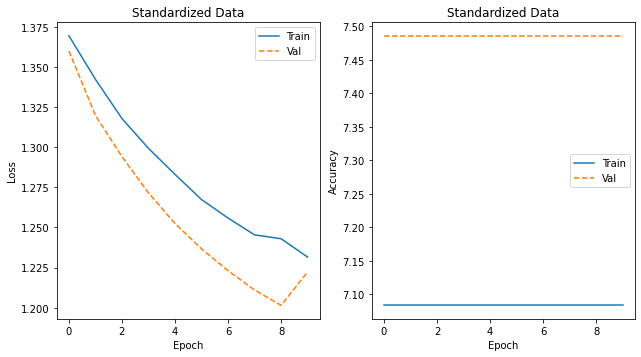

In [31]:
plot_metrics({
    "loss": train_losses, 
    "accuracy": train_accuracies, 
    "val_loss": val_losses, 
    "val_accuracy": val_accuracies
})

# Evalutate Model Predictions

In [32]:
def make_predictions(model, device, test_loader):
    # Set model to eval mode to notify all layers.
    model.eval()
    
    targets = []
    preds = []
    
    # Set torch.no_grad() to disable gradient computation and backpropagation
    with torch.no_grad():
        for sample in test_loader:
            data, target = sample
            data, target = data.to(device), target.to(device)
            
            # Predict for data by doing forward pass
            output = model(data.float())
            pred = torch.round(output)
            preds.append(pred.cpu().numpy())
            targets.append(target.cpu().numpy())
            
    targets = [np.hstack(y) for y in targets]
    preds = [np.hstack(y) for y in preds]
    
    targets = np.hstack(targets)
    preds = np.hstack(preds)
    
    return targets, preds

In [33]:
y_true_baseline, y_pred_baseline = make_predictions(model, device, train_dataloader)

In [34]:
y_true, y_pred = make_predictions(model, device, test_dataloder)

NameError: name 'test_dataloder' is not defined

In [ ]:
# y_true = [np.hstack(y) for y in y_true]
# y_pred = [np.hstack(y) for y in y_pred]

In [ ]:
# y_true = np.hstack(y_true)
# y_pred = np.hstack(y_pred)

In [ ]:
print(len(y_true))
print(len(y_pred))
# Need to account for the [nx2] target vs the torch.max [nx1] pred.  

In [ ]:
def plot_cm(labels, predictions, p=0.5, num_classes=2):
    cm = confusion_matrix(labels, predictions, labels=range(num_classes))
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues)
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])
    print('Total Fraudulent: ', np.sum(cm[1]))

In [ ]:
plot_cm(y_true, y_pred, num_classes=2)

## Plot the ROC
Now plot the ROC. This plot is useful because it shows, at a glance, the range of performance the model can reach just by tuning the output threshold.

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [ ]:
from itertools import cycle
def plot_roc_multiclass(name, labels, predictions, **kwargs):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 2
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        y_test = (labels == i).astype(int)
        y_pred = (predictions == i).astype(int)
        fpr[i], tpr[i], _ = sklearn.metrics.roc_curve(y_test, y_pred)
        roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
#         roc_display = sklearn.metrics.RocCurveDisplay(fpr=fpr[i], tpr=tpr[i]).plot()
    
    lw = 2
    colors = cycle(['blue', 'red', 'green', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw, label='No Skill')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (%)')
    plt.ylabel('True Positive Rate (%)')
    plt.title('Receiver operating characteristic for {} data'.format(name))
    plt.legend(loc="lower right")
    plt.gca().set_aspect('equal')
    plt.show()

In [ ]:
plot_roc_multiclass("Train", y_true_baseline, y_pred_baseline)
plot_roc_multiclass("Test", y_true,  y_pred, linestyle='--')

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_pr_multiclass(name, labels, predictions, **kwargs):
    precision = dict()
    recall = dict()
    thresholds = dict()
    mAP = dict()
    n_classes = 2
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        y_test = (labels == i).astype(int)
        y_pred = (predictions == i).astype(int)
        precision[i], recall[i], thresholds[i] = sklearn.metrics.precision_recall_curve(y_test, y_pred)
        mAP[i] = sklearn.metrics.average_precision_score(y_test, y_pred)
#         pr_display = sklearn.metrics.PrecisionRecallDisplay(precision=precision[i], recall=recall[i]).plot()
        
    lw = 2
    colors = cycle(['blue', 'red', 'green', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(recall[i], precision[i], color=color, lw=lw,
                 label='Percision-Recall curve class {0} (mAP = {1:0.2f})'.format(i, mAP[i]))

    no_skill = len(labels[labels==1]) / len(labels)
    plt.plot([0, 1], [no_skill, no_skill], 'k--', linestyle='--', label='No Skill')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Percision')
    plt.title('Percision-Recall Curve for {} data'.format(name))
    plt.legend(loc="upper right")
    plt.gca().set_aspect('equal')
    plt.show()

In [ ]:
plot_pr_multiclass("Train",  y_true_baseline, y_pred_baseline)
plot_pr_multiclass("Test",  y_true,  y_pred, linestyle='--')